In [8]:
#Create barplots for ROI-based MVPA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D
from statsmodels.stats.multitest import multipletests

In [22]:
#Set variables
subList=[1,3,5,6,7,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,27,28];
conditions_identity = ['FACE_IDENTITY_SPLIT', 'PLACE_IDENTITY_SPLIT']
conditions_face = ['FACEFAMILIAR_IDENTITY', 'FACENONFAMILIAR_IDENTITY']
conditions_place = ['PLACEFAMILIAR_IDENTITY', 'PLACENONFAMILIAR_IDENTITY']
roi_list = ['V1Left', 'V1Right', 'V2Left', 'V2Right', 'FFALeft', 'FFARight', 'PPALeft', 'PPARight', 'IFGLeft', 'IFGRight', 'mPFCLeft', 'mPFCRight', 'mPrecunLeft', 'mPrecunRight', 'OFALeft', 'OFARight', 'TPJLeft', 'TPJRight', 'SPLLeft', 'SPLRight', 'aIPSLeft', 'aIPSRight']
roi = ['V1', 'V2', 'FFA', 'PPA', 'IFG', 'mPFC', 'mPrecun', 'OFA', 'TPJ', 'SPL', 'aIPS']
sheetOrder = [(1,2), (3,4), (5,6), (7,8), (9,10), (11,12), (13,14), (15,16), (17,18), (19,20), (21,22)]
pathToData_identity = r'D:\Google Drive Unitn\ERC_perceptual_awareness_resting_state_project\Analyses\MVPA\regular_leaveOneRunOut\accuracyGroup_{}_sphere9_MVPA_N=23_regular_leaveOneRunOut.xls'
pathToData_nchoosek = r'D:\Users\flavio.ragni\Google Drive Unitn\ERC_perceptual_awareness_resting_state_project\Analyses\MVPA\nchoosek_leaveOneRunOut\accuracyGroup_{}_sphere9_MVPA_N=23_nchoosek_leaveOneRunOut.xls'
chance_identity_split = 1/2

In [23]:
#Load corresponding excel files as csv
d_identity = {}
d_nchoosek = {}
#Create dataset for identity decoding 
for i in conditions_identity:
    d_identity = {condition : pd.read_excel(pathToData_identity.format(condition), sheet_name=None, header=None) for condition in conditions_identity}
#Create dataset for faces decoding 
for i in conditions_face:
    d_faces = {condition : pd.read_excel(pathToData_identity.format(condition), sheet_name=None, header=None) for condition in conditions_face}
#Create dataset for identity decoding 
for i in conditions_place:
    d_places = {condition : pd.read_excel(pathToData_identity.format(condition), sheet_name=None, header=None) for condition in conditions_place}

In [13]:
#Compute all p-values
#Start with identity
pvals_identity = []
pvals_identity_corr = []

#First compute all pvalues for identity
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_identity = [d_identity['FACE_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['PLACE_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['FACE_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][1])][0],
                         d_identity['PLACE_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_identity)):
        t, prob = stats.ttest_1samp(dataPlot_identity[h], chance_identity_split)
        pvals_identity.append(prob)
#Merge p values toghether in one variable
pvals_all = pvals_identity
#Compute FDR correction
pvals_all_corr = multipletests(pvals_all, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
#Split between identity and nchoosek
pvals_identity_corr = pvals_all_corr[0][0:44]
len(pvals_identity_corr)

44

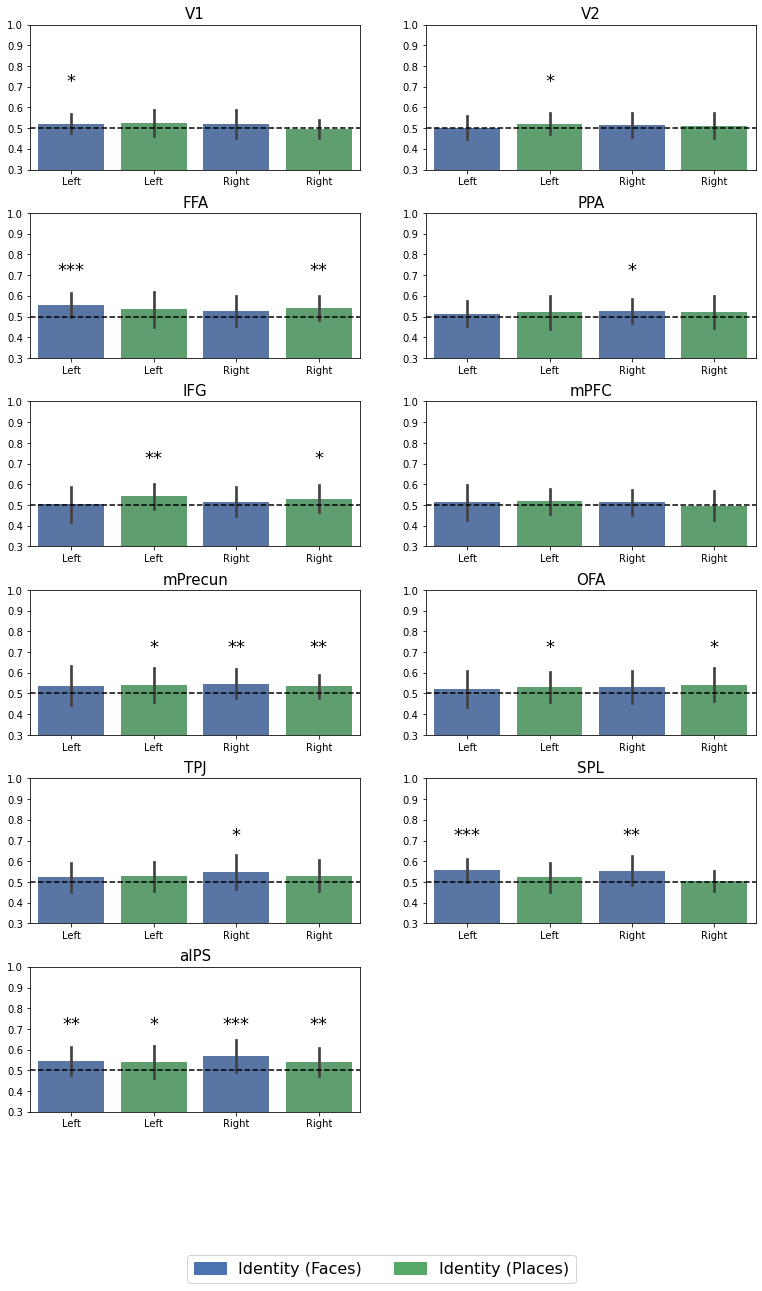

In [32]:
#Make a barplot for each ROI
pvals_identity = []
pvals_identity_corr = []
pvals_identity_corr_id = [[j for j in range((i-1)*4, i*4)] for i in range(1,len(roi) + 1)]
pvals_identity_corr_id = [[0, 1, 2, 3],[4, 5, 6, 7],[8, 9, 10, 11],[12, 13, 14, 15],[16, 17, 18, 19],[20, 21, 22, 23],
                          [24, 25, 26, 27],[28, 29, 30, 31],[32, 33, 34, 35],[36, 37, 38, 39],[40, 41, 42, 43]]
#First compute all pvalues and FDR correction
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_identity = [d_identity['FACE_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['PLACE_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['FACE_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][1])][0],
                         d_identity['PLACE_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_identity)):
        t, prob = stats.ttest_1samp(dataPlot_identity[h], chance_identity_split)
        pvals_identity.append(prob)
#Compute FDR correction
pvals_identity_corr = multipletests(pvals_identity, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)        
#Now make the plot    
fig = plt.figure(figsize=(13,20))
for i in range(len(roi)):
    ax = fig.add_subplot(6,2,i+1)
    sheet = 'Sheet{}'
    dataPlot_identity = [d_identity['FACE_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['PLACE_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['FACE_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][1])][0],
                         d_identity['PLACE_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][1])][0]]
    g = sns.barplot(data=dataPlot_identity, ci='sd', palette=sns.color_palette(["#4c72b0","#55a868","#4c72b0","#55a868"])) 
    g.set_ylim(0.3, 1)
    g.set_xticklabels(['Left', 'Left', 'Right','Right'])
    g.set_title(roi[i], fontsize=15)
    ax1 = g.axes
    ax1.axhline(chance_identity_split, ls='--', color = 'black')
    #Set significance
    for h in range(len(dataPlot_identity)):
        t, prob = stats.ttest_1samp(dataPlot_identity[h], chance_identity_split)
        if pvals_identity_corr[0][pvals_identity_corr_id[i][h]] == True:
            if prob < 0.001:
                g.text(h,0.7,'***', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.7,'**', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.7,'**', ha='center', fontsize=18)
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.7,'*', ha='center', fontsize=18)
        else:
            if prob < 0.001:
                g.text(h,0.7,'***', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.7,'**', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.7,'**', ha='center', fontsize=18)
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.7,'*', ha='center', fontsize=18)
fig.subplots_adjust(hspace=0.3)
#Create legends for comparisons
faceIden_patch = mpatches.Patch(color='#4c72b0', label='Identity (Faces)')
placeIden_patch = mpatches.Patch(color='#55a868', label='Identity (Places)')
fig.legend(handles=[faceIden_patch, placeIden_patch], loc = 'lower center', ncol=2, prop={'size': 16})

In [ ]:
#Compute all p-values
#Start with identity
pvals_face = []
pvals_place = []
pvals_identity_corr = []

#First compute all pvalues for faces
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_face = [d_faces['FACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_faces['FACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_faces['FACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                         d_faces['FACENONFAMILIAR_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_face)):
        t, prob = stats.ttest_1samp(dataPlot_face[h], chance_identity_split)
        pvals_face.append(prob)
#Then compute all pvalues for places
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_place = [d_places['PLACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_places['PLACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_places['PLACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                         d_places['PLACENONFAMILIAR_IDENTITY_SPLIT'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_place)):
        t, prob = stats.ttest_1samp(dataPlot_place[h], chance_identity_split)
        pvals_place.append(prob)
#Merge p values toghether in one variable
pvals_all = pvals_identity + pvals_place
#Compute FDR correction
pvals_all_corr = multipletests(pvals_all, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
#Split between identity and nchoosek
pvals_face_corr = pvals_all_corr[0][0:44]
pvals_place_corr = pvals_all_corr[0][44:]
len(pvals_identity_corr)

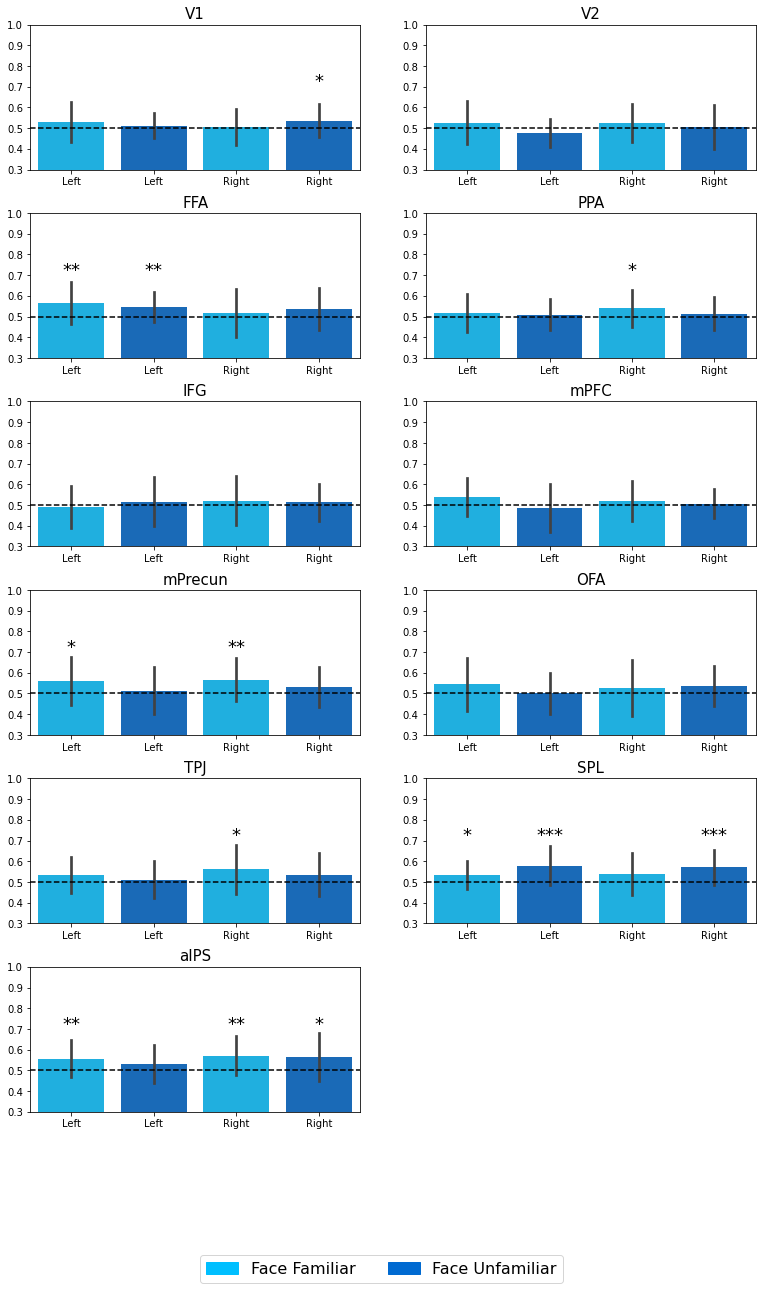

In [30]:
#Make a barplot for each ROI
pvals_face = []
pvals_face_corr = []
pvals_face_corr_id = [[j for j in range((i-1)*4, i*4)] for i in range(1,len(roi) + 1)]
pvals_face_corr_id = [[0, 1, 2, 3],[4, 5, 6, 7],[8, 9, 10, 11],[12, 13, 14, 15],[16, 17, 18, 19],[20, 21, 22, 23],
                          [24, 25, 26, 27],[28, 29, 30, 31],[32, 33, 34, 35],[36, 37, 38, 39],[40, 41, 42, 43]]
#First compute all pvalues and FDR correction
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_face = [d_faces['FACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_faces['FACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_faces['FACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                         d_faces['FACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_face)):
        t, prob = stats.ttest_1samp(dataPlot_face[h], chance_identity_split)
        pvals_face.append(prob)
#Compute FDR correction
pvals_face_corr = multipletests(pvals_face, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)        
#Now make the plot    
fig = plt.figure(figsize=(13,20))
for i in range(len(roi)):
    ax = fig.add_subplot(6,2,i+1)
    sheet = 'Sheet{}'
    dataPlot_face = [d_faces['FACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_faces['FACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_faces['FACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                         d_faces['FACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0]]
    g = sns.barplot(data=dataPlot_face, ci='sd', palette=sns.color_palette(["#00bfff","#006ad1","#00bfff","#006ad1"])) 
    g.set_ylim(0.3, 1)
    g.set_xticklabels(['Left', 'Left', 'Right','Right'])
    g.set_title(roi[i], fontsize=15)
    ax1 = g.axes
    ax1.axhline(chance_identity_split, ls='--', color = 'black')
    #Set significance
    for h in range(len(dataPlot_face)):
        t, prob = stats.ttest_1samp(dataPlot_face[h], chance_identity_split)
        if pvals_face_corr[0][pvals_face_corr_id[i][h]] == True:
            if prob < 0.001:
                g.text(h,0.7,'***', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.7,'**', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.7,'**', ha='center', fontsize=18)
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.7,'*', ha='center', fontsize=18)
        else:
            if prob < 0.001:
                g.text(h,0.7,'***', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.7,'**', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.7,'**', ha='center', fontsize=18)
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.7,'*', ha='center', fontsize=18)
fig.subplots_adjust(hspace=0.3)
#Create legends for comparisons
faceIden_patch = mpatches.Patch(color='#00bfff', label='Face Familiar')
placeIden_patch = mpatches.Patch(color='#006ad1', label='Face Unfamiliar')
fig.legend(handles=[faceIden_patch, placeIden_patch], loc = 'lower center', ncol=2, prop={'size': 16})

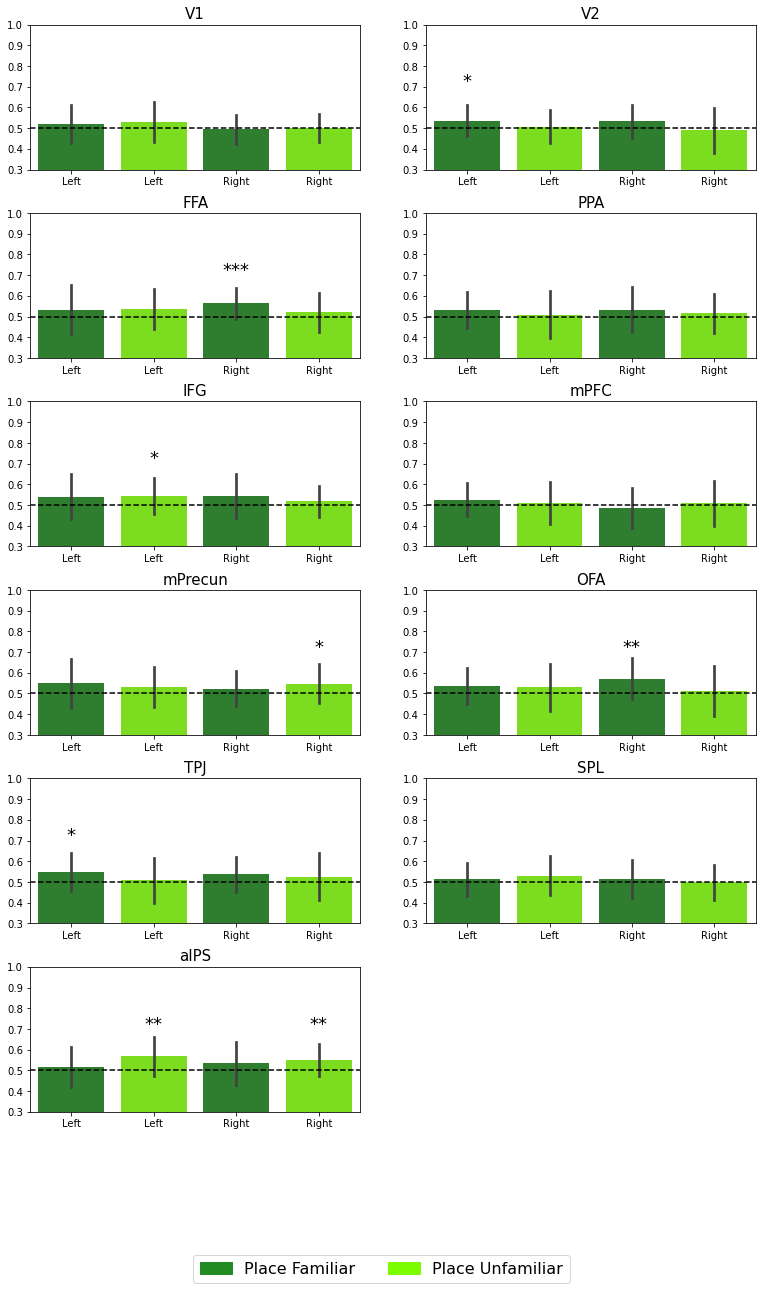

In [31]:
#Make a barplot for each ROI
pvals_place = []
pvals_place_corr = []
pvals_place_corr_id = [[j for j in range((i-1)*4, i*4)] for i in range(1,len(roi) + 1)]
pvals_place_corr_id = [[0, 1, 2, 3],[4, 5, 6, 7],[8, 9, 10, 11],[12, 13, 14, 15],[16, 17, 18, 19],[20, 21, 22, 23],
                          [24, 25, 26, 27],[28, 29, 30, 31],[32, 33, 34, 35],[36, 37, 38, 39],[40, 41, 42, 43]]
#First compute all pvalues and FDR correction
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_place = [d_places['PLACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_places['PLACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_places['PLACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                         d_places['PLACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_place)):
        t, prob = stats.ttest_1samp(dataPlot_place[h], chance_identity_split)
        pvals_place.append(prob)
#Compute FDR correction
pvals_place_corr = multipletests(pvals_place, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)        
#Now make the plot    
fig = plt.figure(figsize=(13,20))
for i in range(len(roi)):
    ax = fig.add_subplot(6,2,i+1)
    sheet = 'Sheet{}'
    dataPlot_place = [d_places['PLACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_places['PLACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_places['PLACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                         d_places['PLACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0]]
    g = sns.barplot(data=dataPlot_place, ci='sd', palette=sns.color_palette(["#228b22","#7cfc00","#228b22","#7cfc00"])) 
    g.set_ylim(0.3, 1)
    g.set_xticklabels(['Left', 'Left', 'Right','Right'])
    g.set_title(roi[i], fontsize=15)
    ax1 = g.axes
    ax1.axhline(chance_identity_split, ls='--', color = 'black')
    #Set significance
    for h in range(len(dataPlot_place)):
        t, prob = stats.ttest_1samp(dataPlot_place[h], chance_identity_split)
        if pvals_face_corr[0][pvals_place_corr_id[i][h]] == True:
            if prob < 0.001:
                g.text(h,0.7,'***', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.7,'**', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.7,'**', ha='center', fontsize=18)
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.7,'*', ha='center', fontsize=18)
        else:
            if prob < 0.001:
                g.text(h,0.7,'***', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.7,'**', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.7,'**', ha='center', fontsize=18)
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.7,'*', ha='center', fontsize=18)
fig.subplots_adjust(hspace=0.3)
#Create legends for comparisons
faceIden_patch = mpatches.Patch(color='#228b22', label='Place Familiar')
placeIden_patch = mpatches.Patch(color='#7cfc00', label='Place Unfamiliar')
fig.legend(handles=[faceIden_patch, placeIden_patch], loc = 'lower center', ncol=2, prop={'size': 16})